# Plot de Batimentos Cardíacos

In [48]:
import os
from os.path import join, dirname
from dotenv import load_dotenv
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [32]:

dotenv_path = join(dirname('__file__'), '.env')

load_dotenv(dotenv_path)

ROOT_PATH = os.environ.get("ROOT_PATH") + "/processed/ecg_beats"

In [94]:
def get_list_files(type_:str) -> list:
    files_list = os.listdir(ROOT_PATH + f"/{type_}")
    return [file for file in files_list if file.endswith('.mat')]



def load_data(type_:str, wave:str, list_files:list) -> list:

    all_waves = []
    
    for f in list_files:
        all_waves.append(loadmat(f"{ROOT_PATH}/{type_}/{f}"))

    return all_waves



def plot_signals(data:list, wave:str, type_:str) -> any:
    for d in data:
        for idx in range(d[wave].shape[1]):
            plt.plot(d[wave][:,idx])

    plt.title(f"{type_} - {wave}")
    plt.show()
    plt.savefig(f"{type_} - {wave}.eps",format='eps')
    plt.savefig(f"{type_} - {wave}.png",format='png')



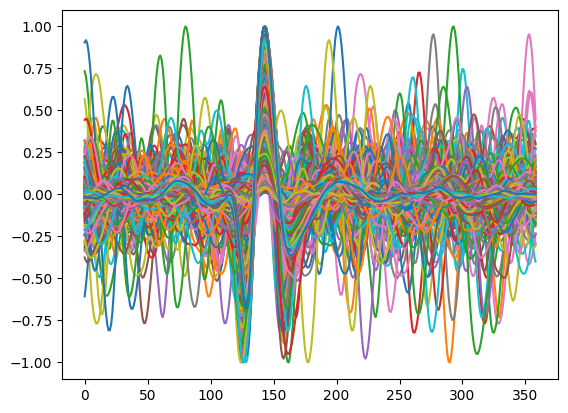

In [102]:
for d in data:
      for idx in range(d['B'].shape[1]):
          plt.plot(d['B'][:,idx])

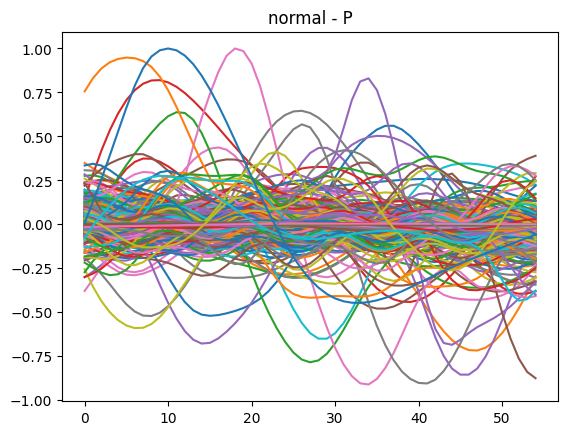

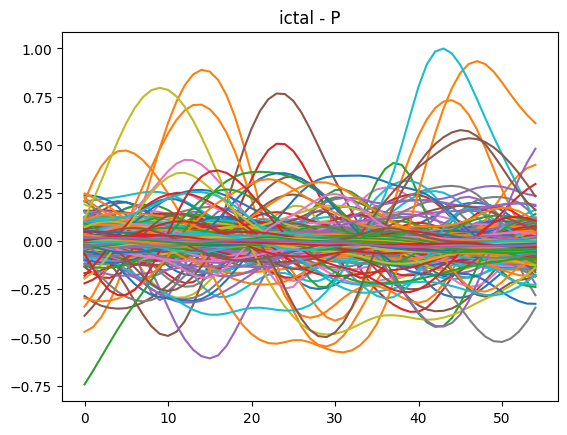

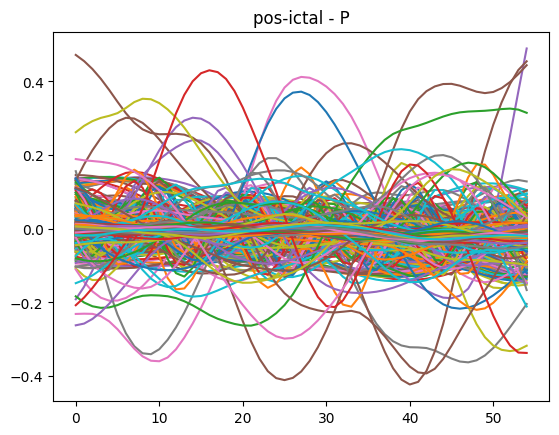

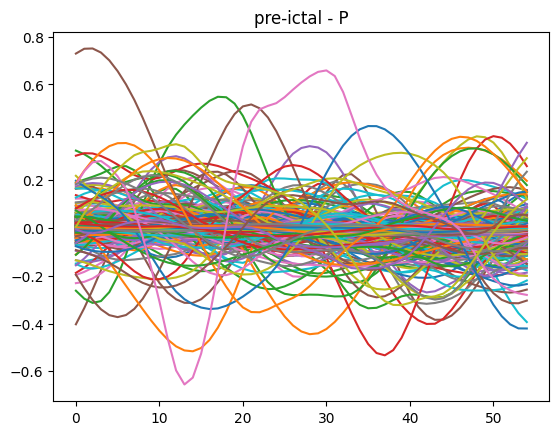

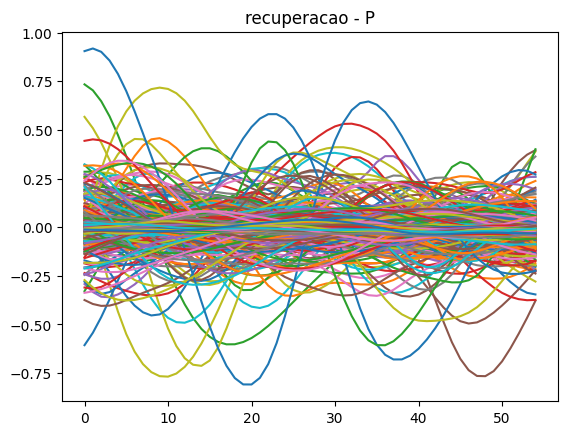

<Figure size 640x480 with 0 Axes>

In [95]:
for type_ in ['normal','ictal','pos-ictal','pre-ictal','recuperacao']:
    list_files = get_list_files(type_=type_)
    
    for wave in ['QRS','B','T','P']:
        data = load_data(type_=type_, wave=wave, list_files=list_files)
        
    plot_signals(data=data, wave=wave, type_=type_)

# for d in data:
#     for idx in range(d[wave].shape[1]):
#         plt.plot(d[wave][:,idx])

# plt.title(f"Ictal - {'B'}")

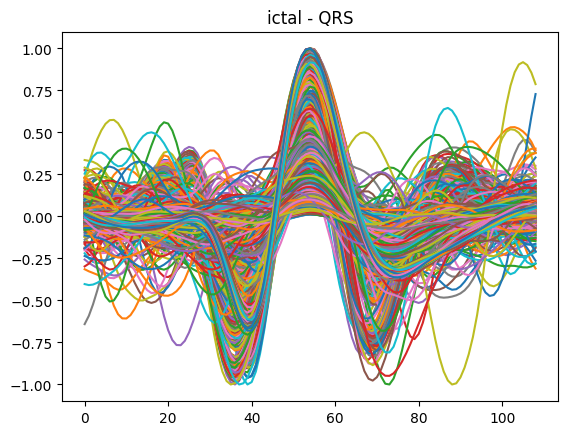

<Figure size 640x480 with 0 Axes>

In [104]:
plot_signals(data=data, wave='QRS', type_='ictal')

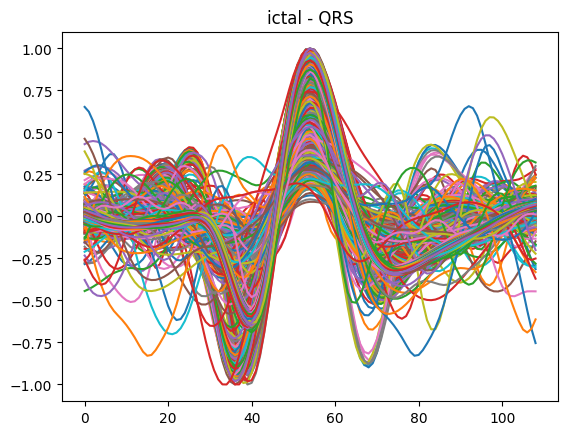

In [86]:
type_='ictal'

list_files = get_list_files(type_=type_)

wave = 'QRS'

data = load_data(type_=type_, wave=wave, list_files=list_files)

plot_signals(data=data, wave=wave, type_=type_)